In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [ ]:
# Check if dataset exists in parent folder
DATA_FILE = os.path.join('..', 'data.csv')
if not os.path.exists(DATA_FILE):
    print("ERROR: data.csv not found in parent Probability folder!")
    raise FileNotFoundError("Dataset file not found")
else:
    print("Dataset found")

Dataset found ✓


In [3]:
ROLL_NUMBER = 102303747

Define transformation function

In [4]:
def transform_values(values, roll):
    a = 0.05 * (roll % 7)
    b = 0.3 * ((roll % 5) + 1)
    print(f"Transformation parameters: a = {a}, b = {b}")
    return values + a * np.sin(b * values)

Define Gaussian-like PDF function

In [5]:
def gaussian_like(x, lam, mu, scale):
    return scale * np.exp(-lam * (x - mu) ** 2)

Calculate empirical density

In [6]:
def empirical_density(data, bins=80):
    density, edges = np.histogram(data, bins=bins, density=True)
    centers = 0.5 * (edges[:-1] + edges[1:])
    return centers, density

Fit parameters using curve fitting

In [7]:
def fit_parameters(x_vals, y_vals, data):
    start = [
        1 / (2 * np.var(data)),
        np.mean(data),
        np.max(y_vals)
    ]
    params, _ = curve_fit(gaussian_like, x_vals, y_vals, p0=start)
    return params

Load and transform data

In [8]:
df = pd.read_csv(DATA_FILE, encoding="latin1")
no2_series = pd.to_numeric(df["no2"], errors="coerce").dropna()
print(f"Number of NO2 samples: {len(no2_series)}")

z = transform_values(no2_series.to_numpy(), ROLL_NUMBER)
print(f"Transformed data range: [{z.min():.2f}, {z.max():.2f}]")

Number of NO2 samples: 419509
Transformation parameters: a = 0.0, b = 0.8999999999999999
Transformed data range: [0.00, 876.00]


C:\Users\bvidy\AppData\Local\Temp\ipykernel_11560\1614409065.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_FILE, encoding="latin1")


Fit PDF parameters

In [9]:
x_emp, y_emp = empirical_density(z)
lam, mu, c = fit_parameters(x_emp, y_emp, z)

print(f"\nEstimated Parameters:")
print(f"lambda = {lam}")
print(f"mu = {mu}")
print(f"c = {c}")


Estimated Parameters:
lambda = 0.00332794952925724
mu = 20.330060129937145
c = 0.031188211198718525


Visualize fitted PDF

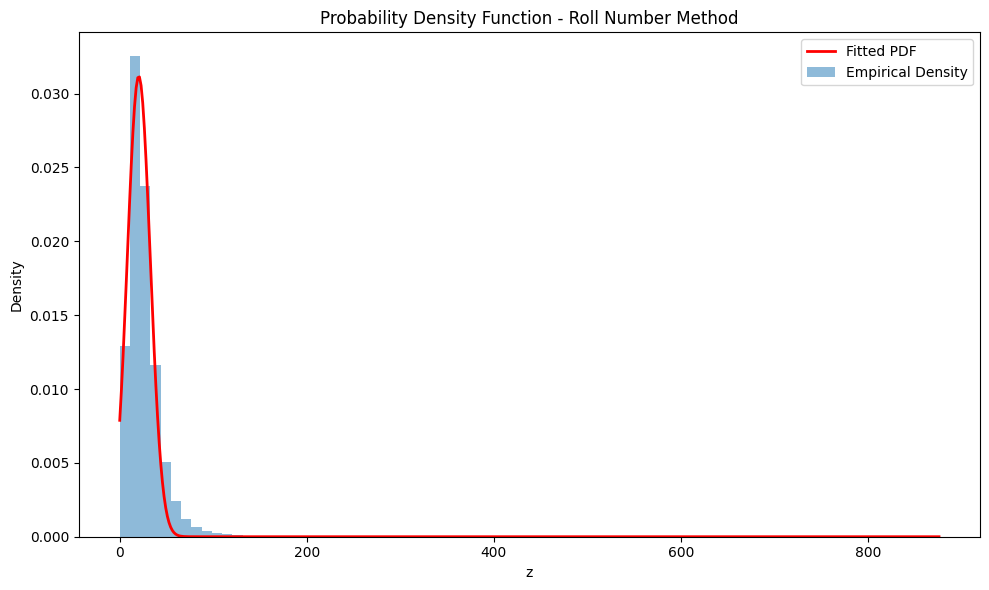

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(x_emp, y_emp, width=(x_emp[1] - x_emp[0]), alpha=0.5, label='Empirical Density')

grid = np.linspace(z.min(), z.max(), 500)
plt.plot(grid, gaussian_like(grid, lam, mu, c), color="red", linewidth=2, label='Fitted PDF')

plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.title("Probability Density Function - Roll Number Method")
plt.tight_layout()
plt.savefig("fitted.png", dpi=300)
plt.show()